# Capstone Project_Plant Pathology

In [1]:
# import libraries

import numpy as np
import scipy as sp
import pandas as pd
from numpy.random import randint


import matplotlib.pyplot as plt
from keras.preprocessing.image import  img_to_array, load_img

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import plotly
plotly.io.orca.config.save()

#!pip install cufflinks
import cufflinks as cf

import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


## Read data

In [2]:
test_data = pd.read_csv("../Data/test.csv")
train_data = pd.read_csv("../Data/train.csv")

## Clean and EDA

In [3]:
test_data.head()

,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4


In [4]:
test_data.shape

(1821, 1)

In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image_id  1821 non-null   object
dtypes: object(1)
memory usage: 14.4+ KB


In [6]:
test_data.isnull().sum()

image_id    0
dtype: int64

In [7]:
train_data.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [8]:
train_data.shape

(1821, 5)

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   image_id           1821 non-null   object
 1   healthy            1821 non-null   int64 
 2   multiple_diseases  1821 non-null   int64 
 3   rust               1821 non-null   int64 
 4   scab               1821 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 71.3+ KB


In [10]:
train_data.isnull().sum()

image_id             0
healthy              0
multiple_diseases    0
rust                 0
scab                 0
dtype: int64

### Show exampels of categories:

### Healthy

In [11]:
healthy_ids = train_data[train_data['healthy'] == 1]['image_id']

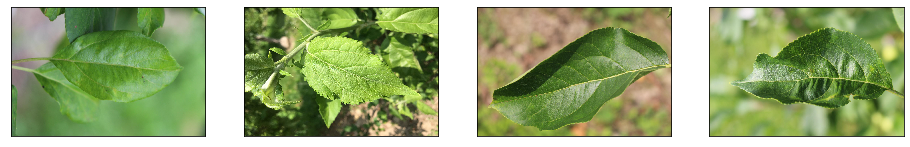

In [12]:
values = randint(0, len(healthy_ids), 4)
imgs = [plt.imread('..\images\\'+healthy_ids.iloc[i]+'.jpg')  for i in values]
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16,10))
for img, ax in zip(imgs, axs):
    ax.imshow(img)
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

In [13]:
healthy_red = []; healthy_green = []; healthy_blue = []
for img_id in values :
    image = load_img('..\images\\' + healthy_ids.iloc[img_id] + '.jpg') # this is a PIL image
    image = img_to_array(image)
    healthy_red.append(np.mean(image[:, :, 0]))
    healthy_green.append(np.mean(image[:, :, 1]))
    healthy_blue.append(np.mean(image[:, :, 2]))

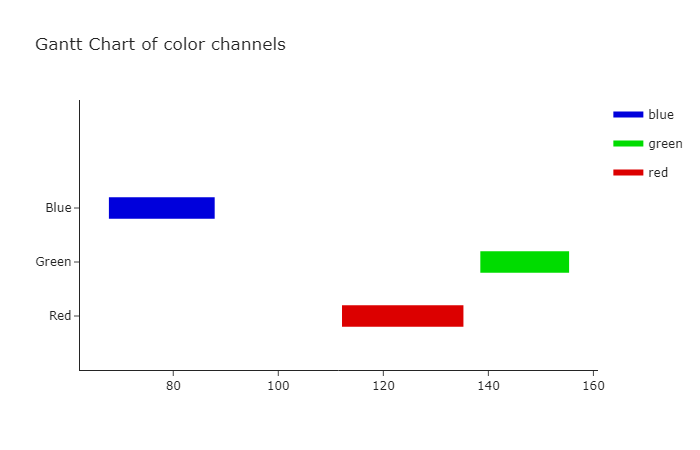

In [14]:
df = [dict(Task="Red", Start=min(healthy_red), Finish=max(healthy_red), Resource='red'),
      dict(Task="Green", Start=min(healthy_green), Finish=max(healthy_green), Resource='green'),
      dict(Task="Blue", Start=min(healthy_blue), Finish=max(healthy_blue), Resource='blue')]

colors = {'red': 'rgb(220, 0, 0)',
          'blue': 'rgb(0, 0, 220)',
          'green': 'rgb(0, 220, 0)'}

fig = ff.create_gantt(df,colors=colors, index_col='Resource', show_colorbar=True)
fig['layout']['xaxis'].update({'type': None}) 
fig.update_layout(title_text="Gantt Chart of color channels", template="simple_white")
#fig.show()
fig.show(renderer="png")

### Rust

In [15]:
rust_ids = train_data[train_data['rust'] == 1]['image_id']

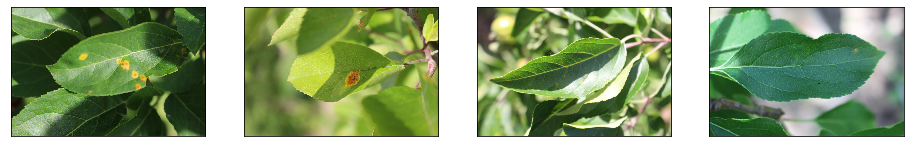

In [16]:
values = randint(0, len(rust_ids), 4)
imgs = [plt.imread('..\images\\'+rust_ids.iloc[i]+'.jpg')  for i in values]
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16,7))
for img, ax in zip(imgs, axs):
    ax.imshow(img)
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

In [17]:
rust_red = []; rust_green = []; rust_blue = []
for img_id in values :
    image = load_img('..\images\\' + rust_ids.iloc[img_id] + '.jpg') # this is a PIL image
    image = img_to_array(image)
    rust_red.append(np.mean(image[:, :, 0]))
    rust_green.append(np.mean(image[:, :, 1]))
    rust_blue.append(np.mean(image[:, :, 2]))

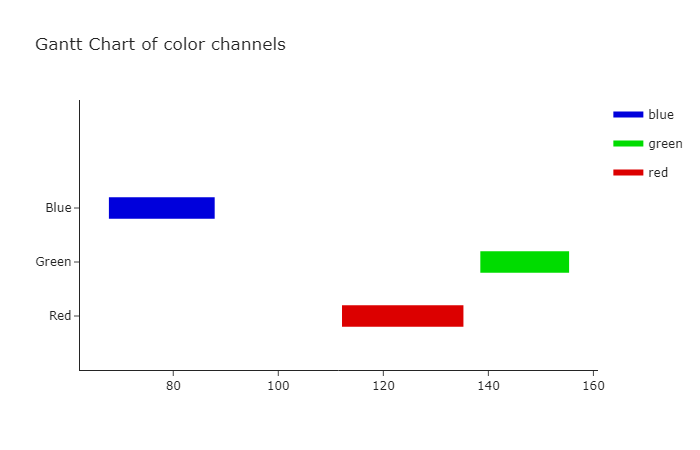

In [18]:
df = [dict(Task="Red", Start=min(healthy_red), Finish=max(healthy_red), Resource='red'),
      dict(Task="Green", Start=min(healthy_green), Finish=max(healthy_green), Resource='green'),
      dict(Task="Blue", Start=min(healthy_blue), Finish=max(healthy_blue), Resource='blue')]

colors = {'red': 'rgb(220, 0, 0)',
          'blue': 'rgb(0, 0, 220)',
          'green': 'rgb(0, 220, 0)'}

fig = ff.create_gantt(df,colors=colors, index_col='Resource', show_colorbar=True)
fig['layout']['xaxis'].update({'type': None}) 
fig.update_layout(title_text="Gantt Chart of color channels", template="simple_white")
#fig.show()
fig.show(renderer="png")

### Scab

In [19]:
scab_ids = train_data[train_data['scab'] == 1]['image_id']

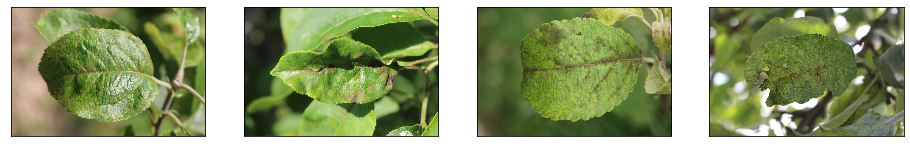

In [20]:
values = randint(0, len(scab_ids), 4)
imgs = [plt.imread('..\images\\'+scab_ids.iloc[i]+'.jpg')  for i in values]
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16,10))
for img, ax in zip(imgs, axs):
    ax.imshow(img)
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

In [21]:
scab_red = []; scab_green = []; scab_blue = []
for img_id in values :
    image = load_img('..\images\\' + scab_ids.iloc[img_id] + '.jpg') # this is a PIL image
    image = img_to_array(image)
    scab_red.append(np.mean(image[:, :, 0]))
    scab_green.append(np.mean(image[:, :, 1]))
    scab_blue.append(np.mean(image[:, :, 2]))

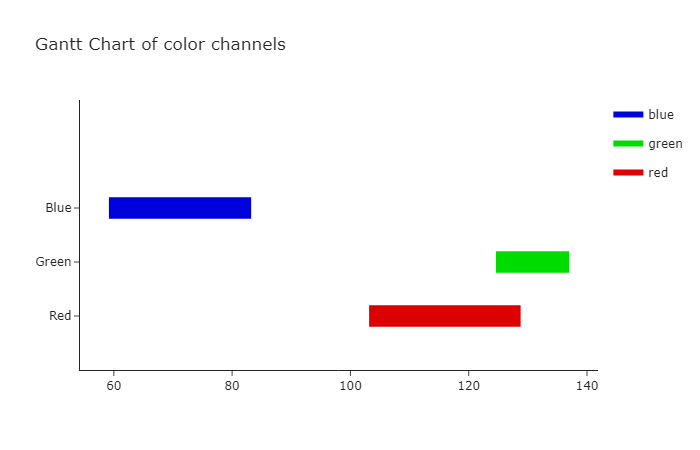

In [22]:
df = [dict(Task="Red", Start=min(scab_red), Finish=max(scab_red), Resource='red'),
      dict(Task="Green", Start=min(scab_green), Finish=max(scab_green), Resource='green'),
      dict(Task="Blue", Start=min(scab_blue), Finish=max(scab_blue), Resource='blue')]

colors = {'red': 'rgb(220, 0, 0)',
          'blue': 'rgb(0, 0, 220)',
          'green': 'rgb(0, 220, 0)'}

fig = ff.create_gantt(df,colors=colors, index_col='Resource', show_colorbar=True)
fig['layout']['xaxis'].update({'type': None}) 
fig.update_layout(title_text="Gantt Chart of color channels", template="simple_white")
#fig.show()
fig.show(renderer="png")

### Multiple diseases

In [23]:
m_diseases_ids = train_data[train_data['multiple_diseases'] == 1]['image_id']

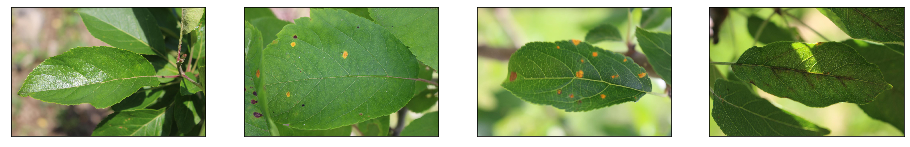

In [24]:
values = randint(0, len(m_diseases_ids), 4)
imgs = [plt.imread('..\images\\'+m_diseases_ids.iloc[i]+'.jpg')  for i in values]
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16,10))
for img, ax in zip(imgs, axs):
    ax.imshow(img)
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

In [25]:
m_diseases_red = []; m_diseases_green = []; m_diseases_blue = []
for img_id in values :
    image = load_img('..\images\\' + m_diseases_ids.iloc[img_id] + '.jpg') # this is a PIL image
    image = img_to_array(image)
    m_diseases_red.append(np.mean(image[:, :, 0]))
    m_diseases_green.append(np.mean(image[:, :, 1]))
    m_diseases_blue.append(np.mean(image[:, :, 2]))

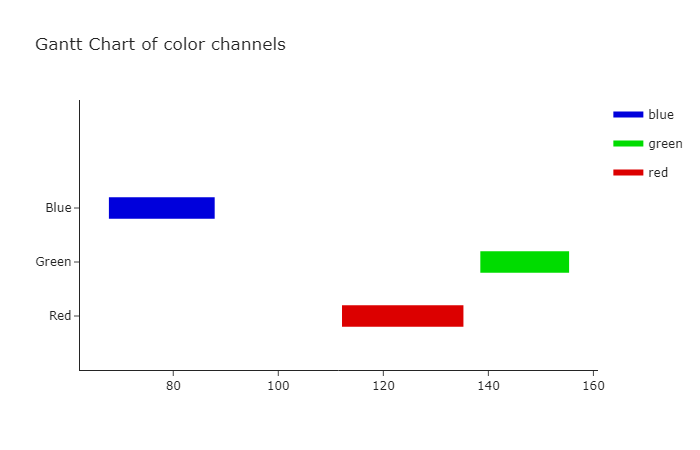

In [26]:
df = [dict(Task="Red", Start=min(healthy_red), Finish=max(healthy_red), Resource='red'),
      dict(Task="Green", Start=min(healthy_green), Finish=max(healthy_green), Resource='green'),
      dict(Task="Blue", Start=min(healthy_blue), Finish=max(healthy_blue), Resource='blue')]

colors = {'red': 'rgb(220, 0, 0)',
          'blue': 'rgb(0, 0, 220)',
          'green': 'rgb(0, 220, 0)'}

fig = ff.create_gantt(df,colors=colors, index_col='Resource', show_colorbar=True)
fig['layout']['xaxis'].update({'type': None}) 
fig.update_layout(title_text="Gantt Chart of color channels", template="simple_white")
#fig.show()
fig.show(renderer="png")

### All images color channels

In [27]:
red_values = []; green_values = []; blue_values = []; all_channels = []

In [28]:
%%time
for img_id in train_data.image_id:
    
    image = load_img('..\images\\' + img_id + '.jpg') # this is a PIL image
    image = img_to_array(image)
    red_values.append(np.mean(image[:, :, 0]))
    green_values.append(np.mean(image[:, :, 1]))
    blue_values.append(np.mean(image[:, :, 2]))
    all_channels.append(np.mean(image))

Wall time: 3min 12s


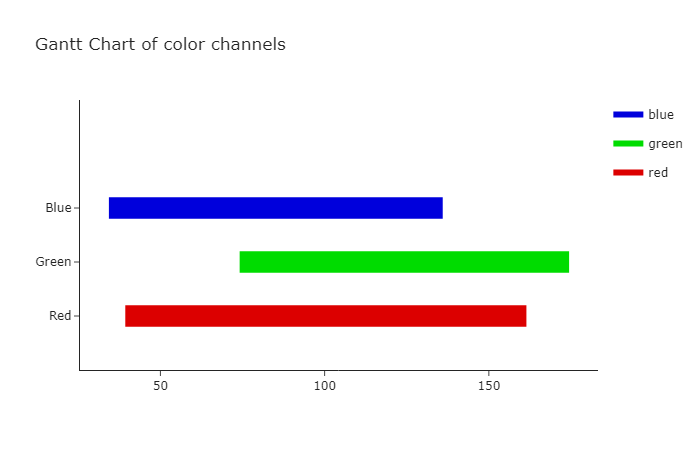

In [29]:
df = [dict(Task="Red", Start=min(red_values), Finish=max(red_values), Resource='red'),
      dict(Task="Green", Start=min(green_values), Finish=max(green_values), Resource='green'),
      dict(Task="Blue", Start=min(blue_values), Finish=max(blue_values), Resource='blue')]

colors = {'red': 'rgb(220, 0, 0)',
          'blue': 'rgb(0, 0, 220)',
          'green': 'rgb(0, 220, 0)'}

fig = ff.create_gantt(df,colors=colors, index_col='Resource', show_colorbar=True)
fig['layout']['xaxis'].update({'type': None}) 
fig.update_layout(title_text="Gantt Chart of color channels", template="simple_white")
#fig.show()
fig.show(renderer="png")

### show all categories

In [30]:
df = pd.DataFrame(data=train_data, columns=['healthy', 'rust', 'scab', 'multiple_diseases'])

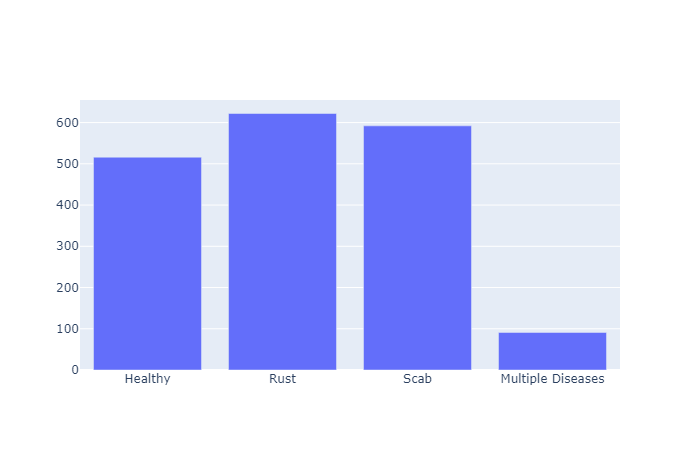

In [31]:
healthy = train_data[train_data['healthy'] == 1]['image_id'].count()
rust = train_data[train_data['rust']==1]['image_id'].count()
scab = train_data[train_data['scab']==1]['image_id'].count()
multiple_diseases = train_data[train_data['multiple_diseases']== 1]['image_id'].count()
#plot all classes
fig = go.Figure([go.Bar(x=['Healthy','Rust','Scab' ,'Multiple Diseases'], y=[healthy,rust,scab,multiple_diseases])])
#fig.show()
fig.show(renderer="png")

In [32]:
Healthy = train_data['healthy'].value_counts()
Rust = train_data['rust'].value_counts()
scab = train_data['scab'].value_counts()
multiple_diseases = train_data['multiple_diseases'].value_counts()

df = pd.DataFrame([Healthy ,Rust,scab,multiple_diseases] )
df.columns = ['0', '1'] 

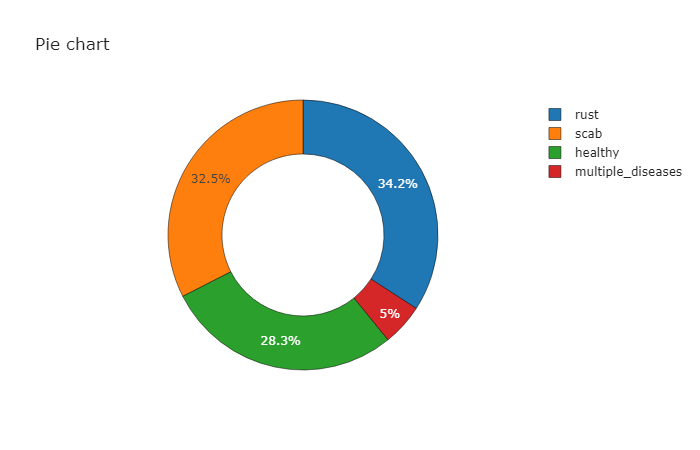

In [33]:
labels = df.index
values = df['1'].tolist()

fig = go.Figure([go.Pie(labels=labels, values=values, hole=.6)])
fig.update_layout(title_text="Pie chart ", template="simple_white")
fig.data[0].marker.line.color = 'rgb(0, 0, 0)'
fig.data[0].marker.line.width = 0.5
#fig.show()
fig.show(renderer="png")

## it's unbalance classes .. we will solve it 

#### Data after image processing with image data generator 

In [35]:
train_balance = pd.read_csv("../Data/balance_train.csv")

In [36]:
Healthy = train_balance['healthy'].value_counts()
Rust = train_balance['rust'].value_counts()
scab = train_balance['scab'].value_counts()
multiple_diseases = train_balance['multiple_diseases'].value_counts()

balance_df = pd.DataFrame([Healthy ,Rust,scab,multiple_diseases] )
balance_df.columns = ['0', '1'] 

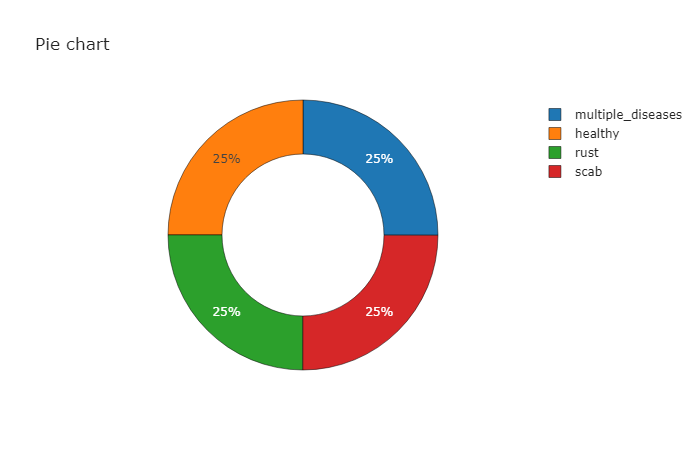

In [37]:
labels = balance_df.index
values = balance_df['1'].tolist()

fig = go.Figure([go.Pie(labels=labels, values=values, hole=.6)])
fig.update_layout(title_text="Pie chart ", template="simple_white")
fig.data[0].marker.line.color = 'rgb(0, 0, 0)'
fig.data[0].marker.line.width = 0.5
#fig.show()
fig.show(renderer="png")